In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [26]:
df = pd.read_csv('Avg_CRU.csv')
df.head()

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-16,26.25,-122.75,NaN
1,1901-01-16,26.25,-122.25,NaN
2,1901-01-16,26.25,-121.75,NaN
3,1901-01-16,26.25,-121.25,NaN
4,1901-01-16,26.25,-120.75,NaN


In [27]:
df.rename(columns={'timeseries-tas-monthly-mean': 'temp'}, inplace=True)
df['time'] = pd.to_datetime(df['time'])
df = df.loc[df['time'] >= '1901-01-01', :]
df = df.set_index('time')
df = df['temp'].resample('MS').mean()

In [28]:
df.head()

time
1901-01-01     0.531472
1901-02-01    -0.762811
1901-03-01     5.054662
1901-04-01    10.079909
1901-05-01    16.190409
Freq: MS, Name: temp, dtype: float64

In [69]:
df.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='time', length=1452, freq='MS')

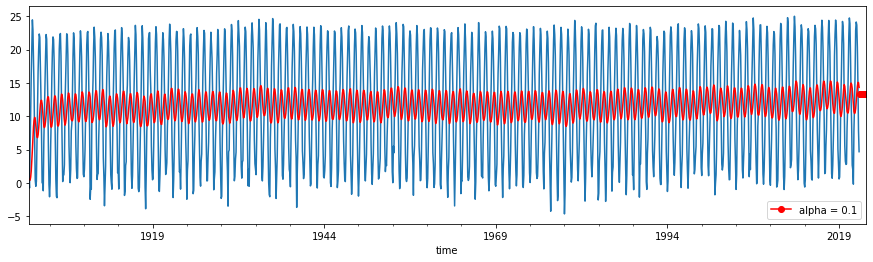

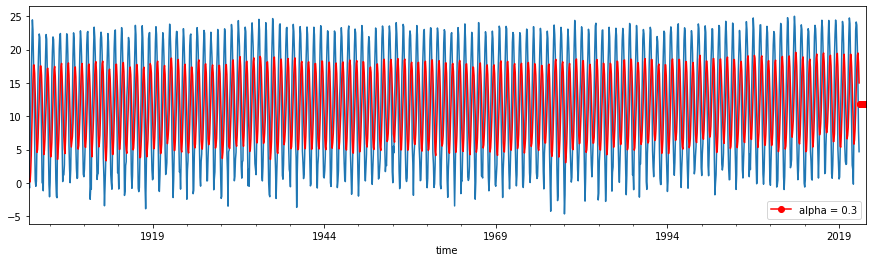

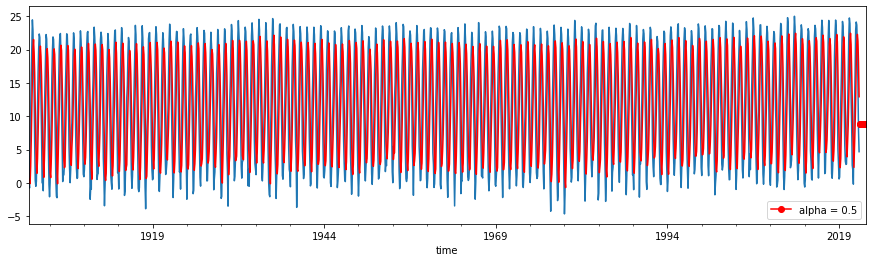

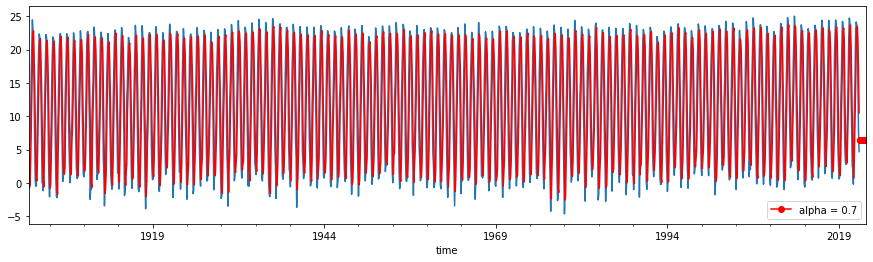

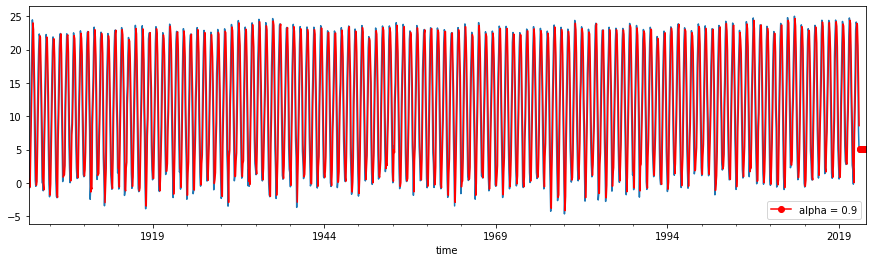

In [32]:
for alpha_sm in [0.1, 0.3, 0.5, 0.7, 0.9]:
    plt.figure(figsize=(15, 4))
    df.plot.line()
    simple_smoothing = SimpleExpSmoothing(df).fit(smoothing_level=alpha_sm, optimized=False)
    forecast = simple_smoothing.forecast(12).rename('alpha = ' + str(alpha_sm))
    forecast.plot(marker='o', color='red', legend=True)
    simple_smoothing.fittedvalues.plot(color='red')
    plt.show()

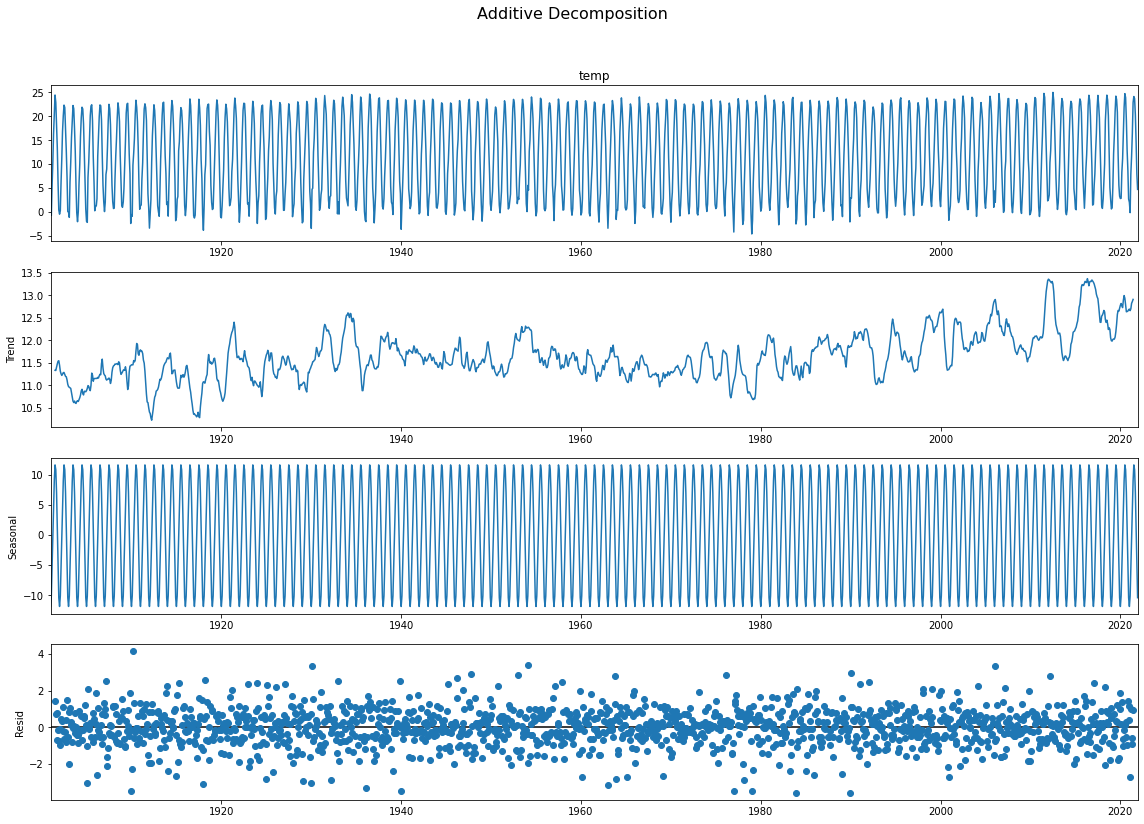

In [48]:
additive_decomposition = seasonal_decompose(df, period=12, model='additive') 
plt.rcParams.update({'figure.figsize': (16, 12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing

HW_model = ExponentialSmoothing(df.values, seasonal_periods=12, trend='add', seasonal='add')
HW_model_fit = HW_model.fit(smoothing_level=0.01)

HW_preds = HW_model_fit.forecast(12)

# Evaluate performance
error = mean_squared_error(HW_preds, HW_preds_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(HW_preds_series, color='blue', label='Predictions')
plt.legend()
plt.ylabel('Energy Consumption (MW)')
plt.show()

NameError: name 'test_series' is not defined

In [66]:
HW_model_fit.fittedvalues

array([-0.55949694,  1.70460389,  4.78875128, ..., 14.26314743,
        7.88481383,  2.80805495])